##CSC 442 Course Project Part 2: Effect of Options-Based Compensation
####Sophie Scherer

In this analysis I will investgate the relationship between a CEO's option-based compensation and the company's tax planning. This analysis will focus on `opt_exer_val` and `opt_unex_unexer_est_val` as the independent variables to predict company performance metrics.

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the merged dataset from github
fullData = pd.read_csv("https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/merged_data.csv")
fullData.head()

,gvkey,tic,act,at,capx,che,cogs,ib,pi,revt,...,opt_unex_unexer_est_val,othcomp,salary,stock_awards,stock_unvest_val,tdc1,tdc2,total_sec,Stock as % of total compensation,Options as % of total compensation
0,1004,AIR,1097.900,1833.100,29.500,81.800,1591.300,89.800,121.200,1990.600,...,1684.328,482.257,1050.000,3272.152,13379.485,7865.228,12846.484,7865.450,0.416028,0.737331
1,1075,PNW,1926.967,24661.153,1889.934,4.955,3077.308,501.557,595.693,4695.991,...,0.000,34.831,1125.000,5028.405,3237.829,3753.703,3753.703,9322.192,1.339585,0.000000
2,1161,AMD,16768.000,67885.000,546.000,5773.000,10833.000,854.000,508.000,22680.000,...,0.000,28.711,1200.000,21848.258,9531.088,8500.023,123065.368,30348.281,2.570376,14.165121
3,1209,APD,5200.500,32002.500,4626.400,1949.200,7474.700,2292.800,2882.400,12600.000,...,0.000,401.795,1350.000,17074.629,18076.385,9994.108,9994.108,22078.099,1.708470,0.000000
4,1230,ALK,2705.000,14613.000,1494.000,1791.000,8106.000,235.000,323.000,10426.000,...,0.000,386.446,637.692,7969.932,0.000,8570.214,8570.214,10313.054,0.929957,0.000000


I will then query the data to select the most relevant columns for my sub-analysis. Specifically, I will be looking at `opt_exer_val` and `opt_unex_unexer_est_val` to narrow my research on options-based compensation. I will also select all the company statistics to research the impact of options-based compensation on a wider range of dependent variables.

In [ ]:
relevantCols = ['opt_exer_val', 'opt_unex_unexer_est_val', 'Options as % of total compensation', 'gvkey', 'tic', 'act', 'at', 'capx', 'che', 'cogs', 'ib', 'pi', 'revt', 'txc', 'txdb', 'txdc', 'txdi', 'txt', 'Total Income Taxes as % of pretax income', 'Total Income Deferred Taxes as % of pretax income', 'Total Income Deferred Taxes as % of total assets', 'state']
optionsAnalysis = fullData[relevantCols]
optionsAnalysis.head()

,opt_exer_val,opt_unex_unexer_est_val,Options as % of total compensation,gvkey,tic,act,at,capx,che,cogs,...,revt,txc,txdb,txdc,txdi,txt,Total Income Taxes as % of pretax income,Total Income Deferred Taxes as % of pretax income,Total Income Deferred Taxes as % of total assets,state
0,5799.275,1684.328,0.737331,1004,AIR,1097.900,1833.100,29.500,81.800,1591.300,...,1990.600,33.600,33.60,-2.200,-2.200,31.400,0.259076,-0.018152,-0.001200,Illinois
1,0.000,0.000,0.000000,1075,PNW,1926.967,24661.153,1889.934,4.955,3077.308,...,4695.991,24.126,2416.48,52.755,52.786,76.912,0.129113,0.088561,0.002139,Arizona
2,120403.857,0.000,14.165121,1161,AMD,16768.000,67885.000,546.000,5773.000,10833.000,...,22680.000,673.000,1202.00,-1019.000,-1019.000,-346.000,-0.681102,-2.005906,-0.015011,California
3,0.000,0.000,0.000000,1209,APD,5200.500,32002.500,4626.400,1949.200,7474.700,...,12600.000,575.900,1266.00,-24.700,-24.700,551.200,0.191230,-0.008569,-0.000772,Pennsylvania
4,0.000,0.000,0.000000,1230,ALK,2705.000,14613.000,1494.000,1791.000,8106.000,...,10426.000,-7.000,695.00,81.000,95.000,88.000,0.272446,0.250774,0.005543,Washington


I will first calculate summary statistics for the options-based compensation variables to grasp the distributions.

In [ ]:
optionsAnalysis['opt_exer_val'].describe()

,opt_exer_val
count,1152.000000
mean,3569.100162
std,32819.644346
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,942484.793000


In [ ]:
optionsAnalysis['opt_unex_unexer_est_val'].describe()

,opt_unex_unexer_est_val
count,1152.000000
mean,1281.481163
std,7328.929079
min,0.000000
25%,0.000000
50%,0.000000
75%,94.175750
max,165150.000000


In [ ]:
optionsAnalysis['Options as % of total compensation'].describe()

,Options as % of total compensation
count,1148.000000
mean,10.192413
std,255.885986
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8062.939613


These summary statistics reveal that the distributions would be highly left skewed, as the majority of the executives receive no option based compensation and few executives receive very high option based compensation. The number of executives receiving no option based compensation is quantified below:

In [ ]:
noOptExer = optionsAnalysis['opt_exer_val'].value_counts()[0]
noOptUnexer = optionsAnalysis['opt_unex_unexer_est_val'].value_counts()[0]
totalExecs = optionsAnalysis.shape[0]
percentOptExer = noOptExer/totalExecs * 100
percentOptUnexer = noOptUnexer/totalExecs *100
print(f"There are {totalExecs} executives in total.")
print(f"There are {noOptExer} ({percentOptExer:.1f}%) executives with no exercised option-based compensation.")
print(f"There are {noOptUnexer} ({percentOptUnexer:.1f}%) executives with no unexercised option-based compensation.")

There are 1152 executives in total.
There are 912 (79.2%) executives with no exercised option-based compensation.
There are 835 (72.5%) executives with no unexercised option-based compensation.


A large portion of executives in the dataset do not receive any form of option-based compensation, and this skew will impact the exploration. To better investigate the relationship between option-based compensation and tax planning, I will query the dataset to only consider executives with non-zero option based compensation. Because this was a fairly straightforward query with only two parameters, the query ran very quickly (less than .01 seconds).

In [ ]:
import time
start_time = time.time()
optionsAnalysisNonzero = optionsAnalysis[(optionsAnalysis['opt_exer_val'] > 0) | (optionsAnalysis['opt_unex_unexer_est_val'] > 0)]
end_time = time.time()
print(f"The query ran in {end_time - start_time:.5f} seconds.")
optionsAnalysisNonzero.head()

The query ran in 0.00188 seconds.


,opt_exer_val,opt_unex_unexer_est_val,Options as % of total compensation,gvkey,tic,act,at,capx,che,cogs,...,revt,txc,txdb,txdc,txdi,txt,Total Income Taxes as % of pretax income,Total Income Deferred Taxes as % of pretax income,Total Income Deferred Taxes as % of total assets,state
0,5799.275,1684.328,0.737331,1004,AIR,1097.900,1833.100,29.500,81.800,1591.300,...,1990.60,33.600,33.600,-2.200,-2.200,31.400,0.259076,-0.018152,-0.001200,Illinois
2,120403.857,0.000,14.165121,1161,AMD,16768.000,67885.000,546.000,5773.000,10833.000,...,22680.00,673.000,1202.000,-1019.000,-1019.000,-346.000,-0.681102,-2.005906,-0.015011,California
6,3112.053,2198.296,0.220435,1300,HON,23502.000,61525.000,1039.000,8095.000,22044.000,...,36662.00,1334.000,2094.000,153.000,153.000,1487.000,0.207711,0.021372,0.002487,North Carolina
7,348.977,0.000,0.128940,1327,SWKS,3179.500,8426.700,210.300,734.400,2037.100,...,4772.40,238.900,9.100,-151.200,-142.900,96.000,0.088988,-0.140156,-0.017943,California
11,6915.357,3319.290,0.752489,1598,AME,2824.668,15023.533,136.249,409.804,3874.849,...,6596.95,385.126,836.695,-91.903,-91.902,293.224,0.182533,-0.057210,-0.006117,Pennsylvania


In [ ]:
optionsAnalysisNonzero['opt_exer_val'].describe()

,opt_exer_val
count,436.000000
mean,9430.282998
std,52864.534819
min,0.000000
25%,0.000000
50%,235.128000
75%,4605.950500
max,942484.793000


Because the resulting sub dataset is still very skewed by a few large outliers, I will remove any datapoints above Q3 + 1.5*IQR for either of these variables (no datapoints less than 0 on the lower end).

In [ ]:
iqrExer = 1.5 * (optionsAnalysisNonzero['opt_exer_val'].quantile(.75) - optionsAnalysisNonzero['opt_exer_val'].quantile(.25))
iqrUnexer = 1.5 * (optionsAnalysisNonzero['opt_unex_unexer_est_val'].quantile(.75) - optionsAnalysisNonzero['opt_unex_unexer_est_val'].quantile(.25))
optionsAnalysisQuery = optionsAnalysisNonzero[(optionsAnalysisNonzero['opt_unex_unexer_est_val'] <= optionsAnalysisNonzero['opt_unex_unexer_est_val'].quantile(.75) + iqrUnexer)
                                                & (optionsAnalysisNonzero['opt_exer_val'] <= optionsAnalysisNonzero['opt_exer_val'].quantile(.75) + iqrExer)]
optionsAnalysisQuery.shape
print(f"There are {optionsAnalysisQuery.shape[0]} executives with non-outlier option-based compensation.")

There are 339 executives with non-outlier option-based compensation.


To visualize the distribution of options compensation amounts by executive, I will create histograms of the `opt_exer_val`, `opt_unex_unexer_est_val`, and `Options as % of total compensation`. `Options as % of total compensation` measures the percent of the executive's total compensation represented by `opt_exer_val`.

array([[<Axes: title={'center': 'Options as % of total compensation'}>,
        <Axes: title={'center': 'opt_exer_val'}>],
       [<Axes: title={'center': 'opt_unex_unexer_est_val'}>, <Axes: >]],
      dtype=object)

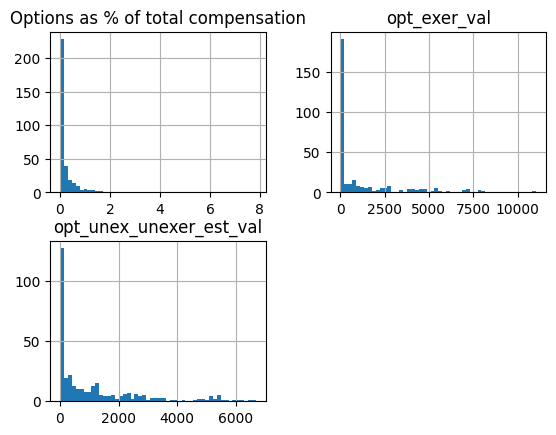

In [ ]:
optionsAnalysisQuery[['Options as % of total compensation', 'opt_exer_val', 'opt_unex_unexer_est_val']].hist(bins = 50)

These visualizations demonstrate that the distribution of option-based compensation is highly right-skewed, even after removing zero-value and outlier entries. Scaling the option compensation by total compensation slightly smooths the distribution, but it remains heavily right-skewed.

I will then create a scatterplot matrix to quickly visualize the linear relationships between all variables in the queried dataset.

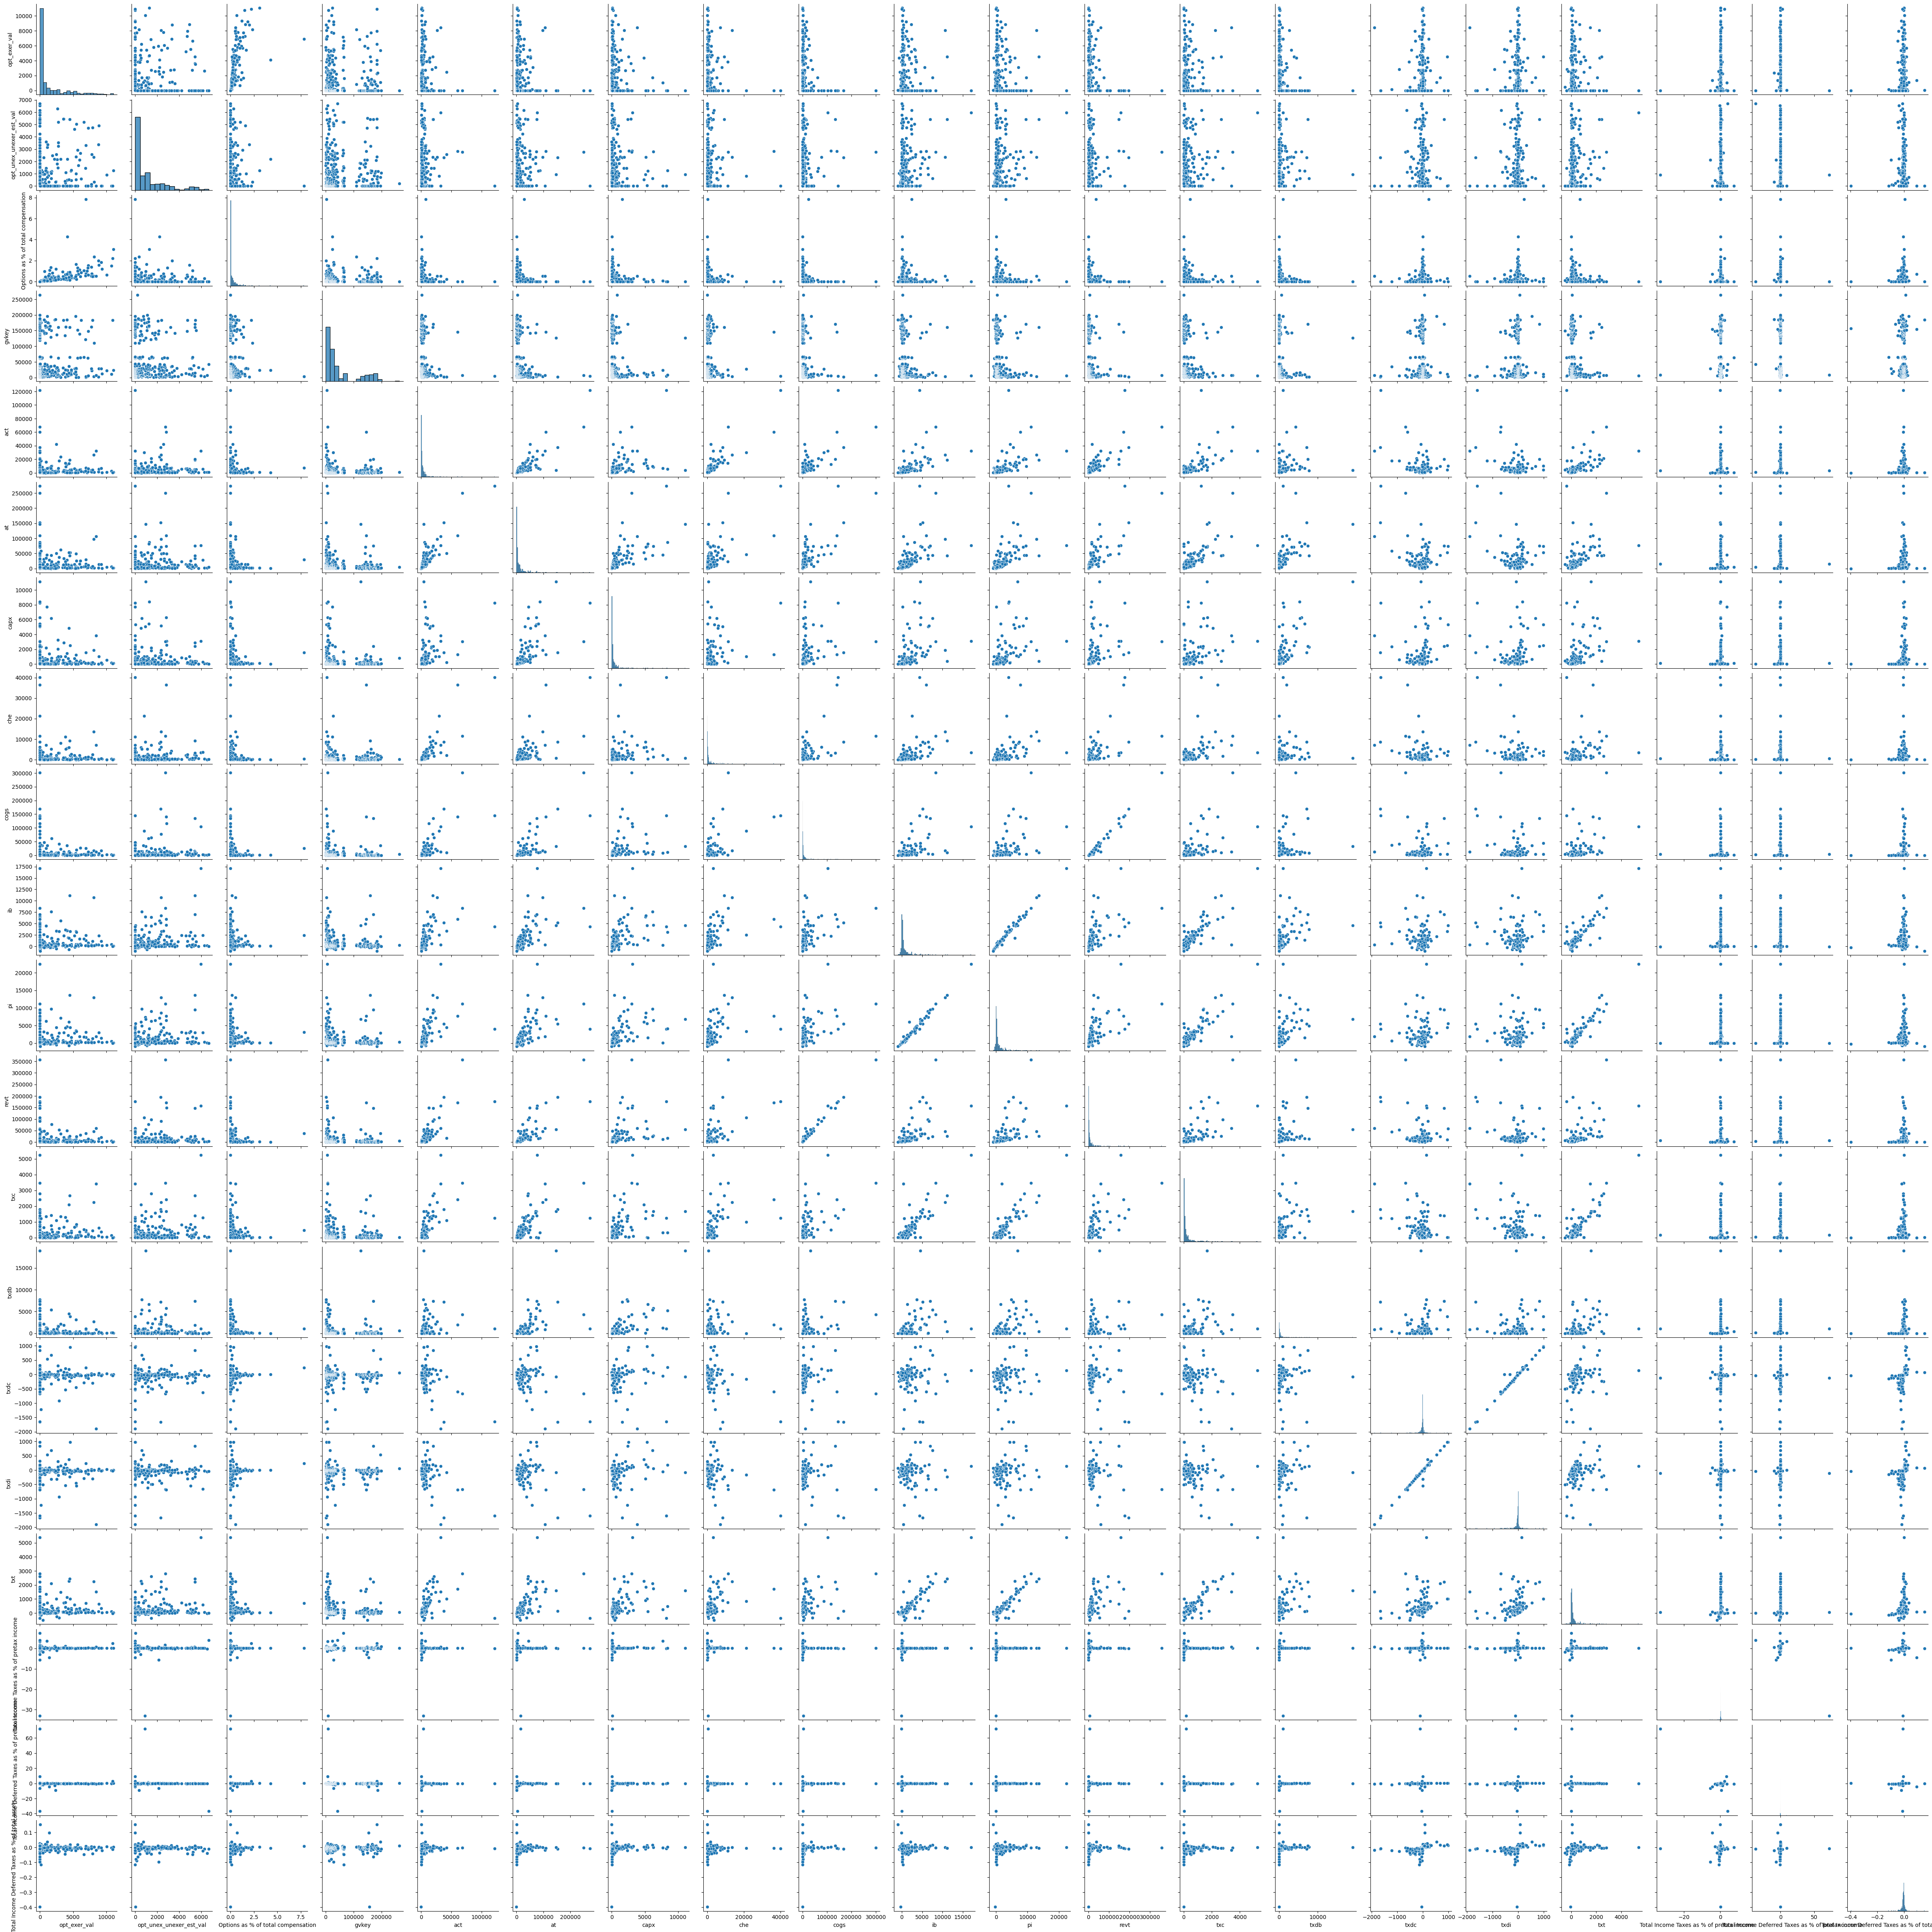

In [ ]:
sns.pairplot(optionsAnalysisQuery)

From the above pair plot, we can see that `txt`, `txc`, and `pi` seem to have some of the strongest correlations with the options-based compensation variables (represented by the first three columns of the scatter plot grid). I will create more detailed visualizations to investigate these relationships, as well as the relationship to `txdc` as this factor is related to tax planning.

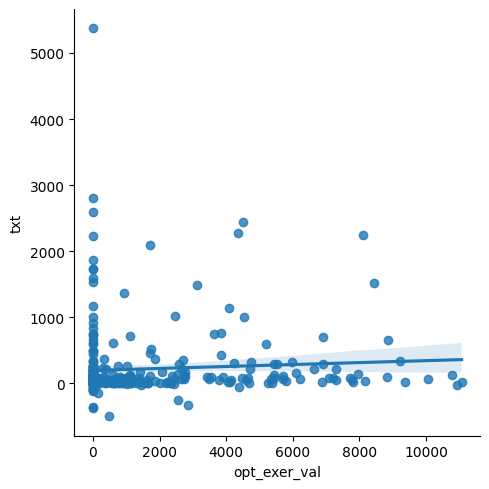

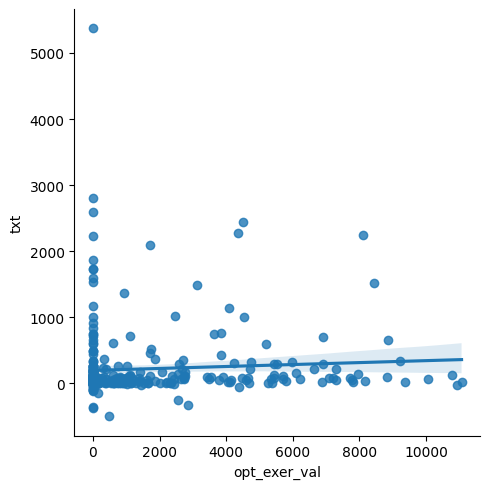

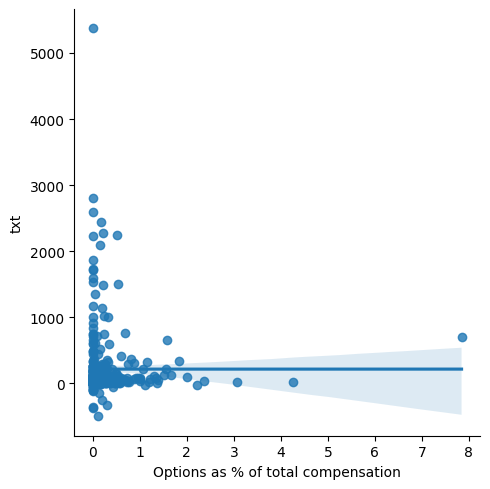

In [ ]:
sns.lmplot(data = optionsAnalysisQuery, x = 'opt_exer_val', y = 'txt')
sns.lmplot(data = optionsAnalysisQuery, x = 'opt_exer_val', y = 'txt')
sns.lmplot(data = optionsAnalysisQuery, x = 'Options as % of total compensation', y = 'txt')

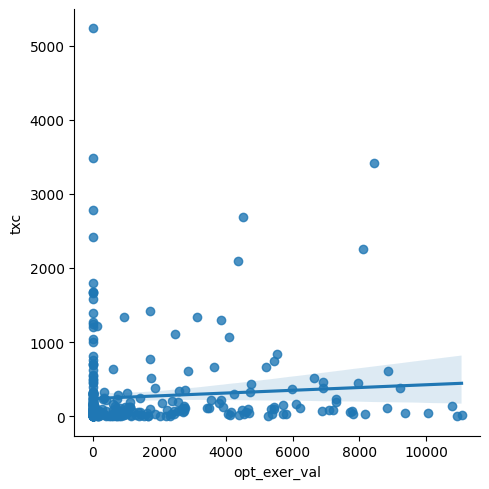

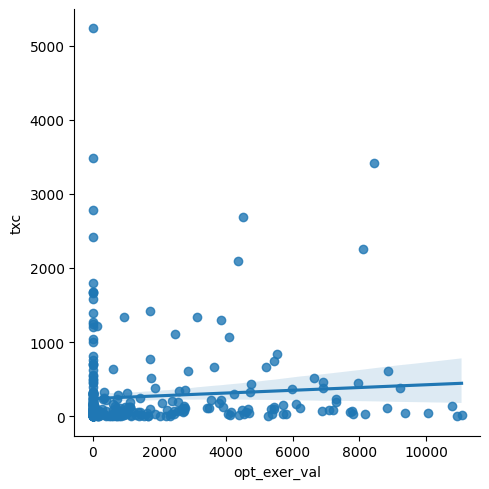

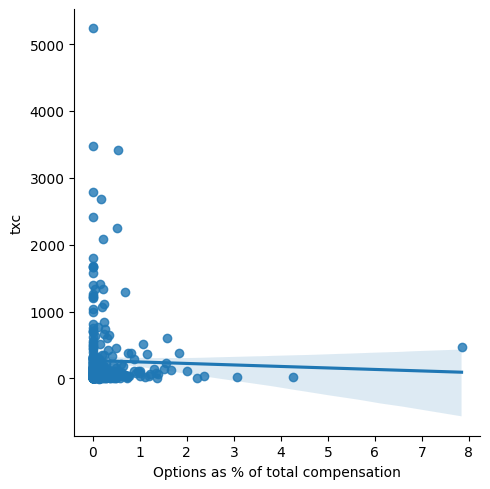

In [ ]:
sns.lmplot(data = optionsAnalysisQuery, x = 'opt_exer_val', y = 'txc')
sns.lmplot(data = optionsAnalysisQuery, x = 'opt_exer_val', y = 'txc')
sns.lmplot(data = optionsAnalysisQuery, x = 'Options as % of total compensation', y = 'txc')

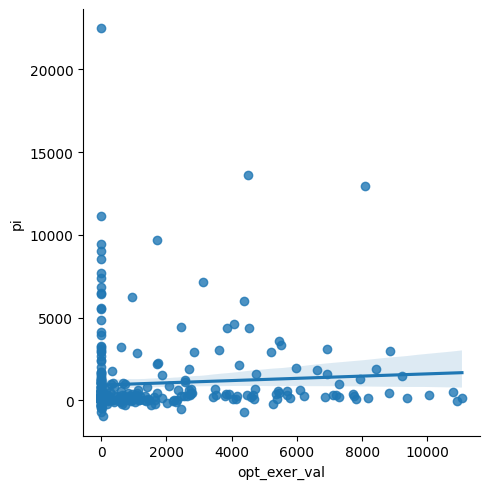

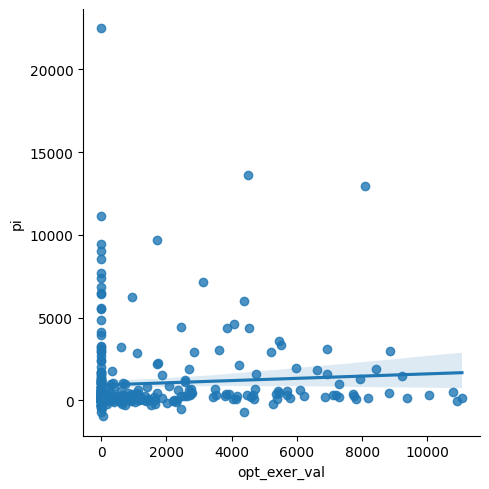

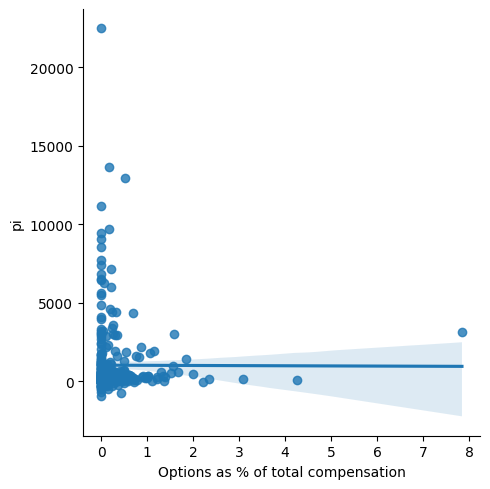

In [ ]:
sns.lmplot(data = optionsAnalysisQuery, x = 'opt_exer_val', y = 'pi')
sns.lmplot(data = optionsAnalysisQuery, x = 'opt_exer_val', y = 'pi')
sns.lmplot(data = optionsAnalysisQuery, x = 'Options as % of total compensation', y = 'pi')

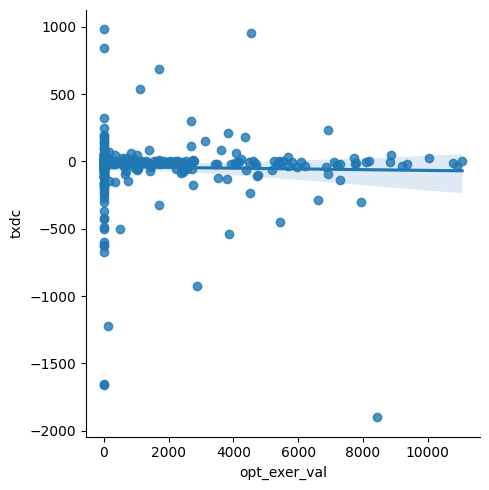

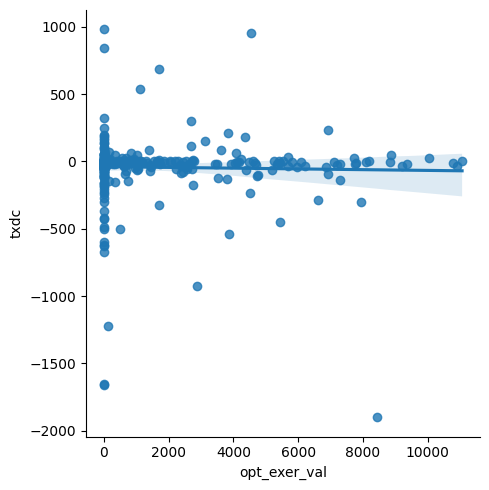

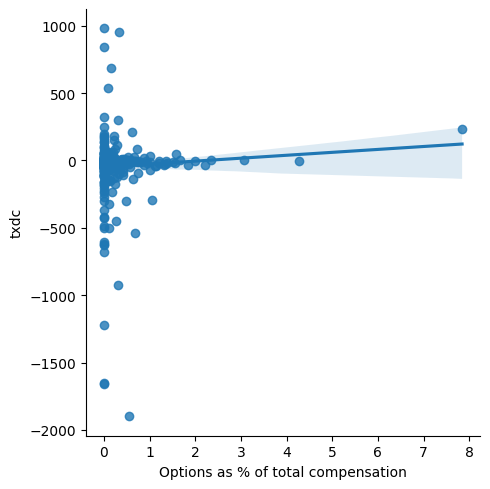

In [ ]:
sns.lmplot(data = optionsAnalysisQuery, x = 'opt_exer_val', y = 'txdc')
sns.lmplot(data = optionsAnalysisQuery, x = 'opt_exer_val', y = 'txdc')
sns.lmplot(data = optionsAnalysisQuery, x = 'Options as % of total compensation', y = 'txdc')

Finally, I will compare the distribution of relevant tax planning variables between companies led by CEOs with and without option-based compensation. For visualization purposes, I will remove the outliers for each of these variables.

<Axes: >

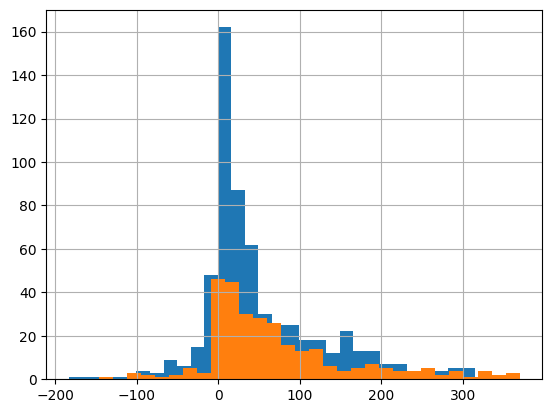

In [ ]:
# Query dataset for just CEO with zero option-based compensation of either type
optionsAnalysisZero = optionsAnalysis[(optionsAnalysis['opt_exer_val'] == 0) & (optionsAnalysis['opt_unex_unexer_est_val'] == 0)]

iqrtxtZ = 1.5 * (optionsAnalysisZero['txt'].quantile(.75) - optionsAnalysisZero['txt'].quantile(.25))
iqrtxtNZ = 1.5 * (optionsAnalysisQuery['txt'].quantile(.75) - optionsAnalysisQuery['txt'].quantile(.25))
optionsAnalysisZtxt = optionsAnalysisZero[(optionsAnalysisZero['txt'] <= optionsAnalysisZero['txt'].quantile(.75) + iqrtxtZ)
                                        & (optionsAnalysisZero['txt'] >= optionsAnalysisZero['txt'].quantile(.25) - iqrtxtZ)]

optionsAnalysisNZtxt = optionsAnalysisQuery[(optionsAnalysisQuery['txt'] <= optionsAnalysisQuery['txt'].quantile(.75) + iqrtxtNZ)
                                          & (optionsAnalysisQuery['txt'] >= optionsAnalysisQuery['txt'].quantile(.25) - iqrtxtNZ)]

optionsAnalysisZtxt['txt'].hist(bins=30)
optionsAnalysisNZtxt['txt'].hist(bins=30)

<Axes: >

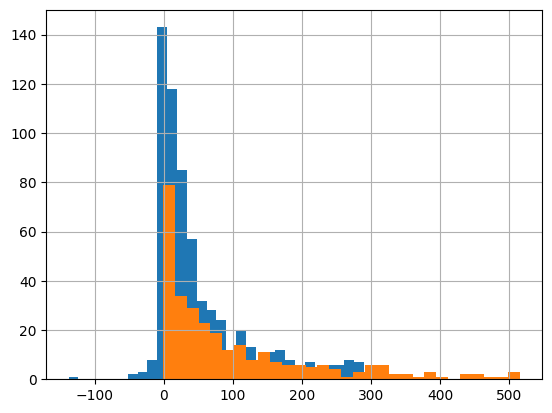

In [ ]:
iqrtxcZ = 1.5 * (optionsAnalysisZero['txc'].quantile(.75) - optionsAnalysisZero['txc'].quantile(.25))
iqrtxcNZ = 1.5 * (optionsAnalysisQuery['txc'].quantile(.75) - optionsAnalysisQuery['txc'].quantile(.25))
optionsAnalysisZtxc = optionsAnalysisZero[(optionsAnalysisZero['txc'] <= optionsAnalysisZero['txc'].quantile(.75) + iqrtxcZ)
                                        & (optionsAnalysisZero['txc'] >= optionsAnalysisZero['txc'].quantile(.25) - iqrtxcZ)]

optionsAnalysisNZtxc = optionsAnalysisQuery[(optionsAnalysisQuery['txc'] <= optionsAnalysisQuery['txc'].quantile(.75) + iqrtxcNZ)
                                          & (optionsAnalysisQuery['txc'] >= optionsAnalysisQuery['txc'].quantile(.25) - iqrtxcNZ)]

optionsAnalysisZtxc['txc'].hist(bins=30)
optionsAnalysisNZtxc['txc'].hist(bins=30)

<Axes: >

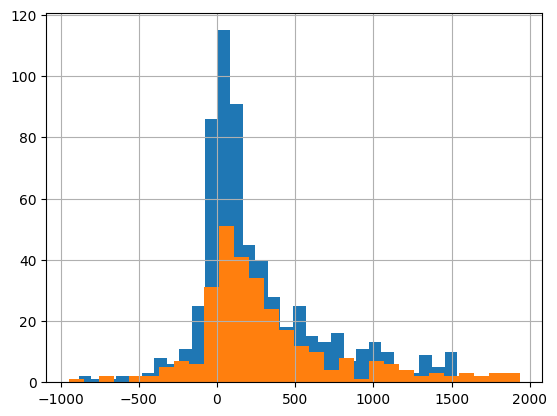

In [ ]:
iqrpiZ = 1.5 * (optionsAnalysisZero['pi'].quantile(.75) - optionsAnalysisZero['pi'].quantile(.25))
iqrpiNZ = 1.5 * (optionsAnalysisQuery['pi'].quantile(.75) - optionsAnalysisQuery['pi'].quantile(.25))
optionsAnalysisZpi = optionsAnalysisZero[(optionsAnalysisZero['pi'] <= optionsAnalysisZero['pi'].quantile(.75) + iqrpiZ)
                                        & (optionsAnalysisZero['pi'] >= optionsAnalysisZero['pi'].quantile(.25) - iqrpiZ)]

optionsAnalysisNZpi = optionsAnalysisQuery[(optionsAnalysisQuery['pi'] <= optionsAnalysisQuery['pi'].quantile(.75) + iqrpiNZ)
                                          & (optionsAnalysisQuery['pi'] >= optionsAnalysisQuery['pi'].quantile(.25) - iqrpiNZ)]

optionsAnalysisZpi['pi'].hist(bins=30)
optionsAnalysisNZpi['pi'].hist(bins=30)

<Axes: >

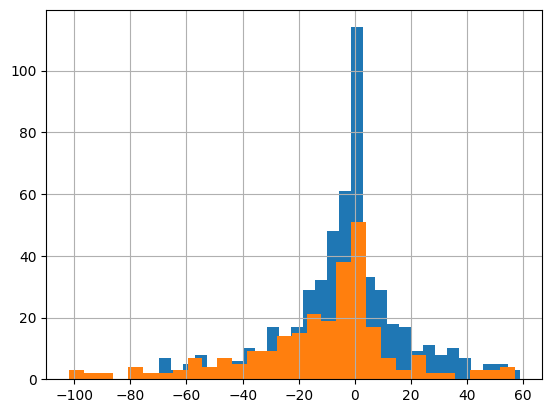

In [ ]:
iqrtxdcZ = 1.5 * (optionsAnalysisZero['txdc'].quantile(.75) - optionsAnalysisZero['txdc'].quantile(.25))
iqrtxdcNZ = 1.5 * (optionsAnalysisQuery['txdc'].quantile(.75) - optionsAnalysisQuery['txdc'].quantile(.25))
optionsAnalysisZtxdc = optionsAnalysisZero[(optionsAnalysisZero['txdc'] <= optionsAnalysisZero['txdc'].quantile(.75) + iqrtxdcZ)
                                        & (optionsAnalysisZero['txdc'] >= optionsAnalysisZero['txdc'].quantile(.25) - iqrtxdcZ)]

optionsAnalysisNZtxdc = optionsAnalysisQuery[(optionsAnalysisQuery['txdc'] <= optionsAnalysisQuery['txdc'].quantile(.75) + iqrtxdcNZ)
                                          & (optionsAnalysisQuery['txdc'] >= optionsAnalysisQuery['txdc'].quantile(.25) - iqrtxdcNZ)]

optionsAnalysisZtxdc['txdc'].hist(bins=30)
optionsAnalysisNZtxdc['txdc'].hist(bins=30)

In [ ]:
optionsAnalysisZtxdc['txdc'].describe()

,txdc
count,546.000000
mean,-4.082788
std,22.474463
min,-69.843000
25%,-13.496500
50%,-1.499500
75%,4.797500
max,58.700000


In [ ]:
optionsAnalysisNZtxdc['txdc'].describe()

,txdc
count,266.000000
mean,-12.926447
std,28.307592
min,-102.000000
25%,-25.334500
50%,-5.858000
75%,0.153250
max,57.000000
